In [99]:
from numpy import *
import scipy as sp
from scipy import signal
from pylab import *
import string

from datetime import date
import imp
AgilentSCPI=imp.load_source('AgilentSCPI','c:/Users/Jacob/Nonlinearity/Codes/AgilentSCPI.py')
import time
import numpy as np
import sys
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 16
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
from IPython.display import HTML
from IPython.display import Image
import csv
import os
import decimal
print(time.ctime())

Tue Mar 16 12:34:10 2021


In [100]:
pathbase='c:/Users/Jacob/Nonlinearity/Data/2020-07-23/Trial1/'
# pathbase='c:/Users/Jacob/Nonlinearity/Data/Press/Homo-cement/O2/2021-02-02_03/Trial1/'
Folder_Name = os.listdir(pathbase)
print(Folder_Name)
%run c:/Users/Jacob/Nonlinearity/Codes/ComputeDelays.py
FILE_NAME = '10.0V'

delaystep=1
start=50
stop=53
delay_scale_fact=1 #If you've named the files with some scaling factor so ppX.csv is for delay x/10 then set 
    #                   the scale factor to 10
start_name=1
print(time.ctime())

['.DS_Store', '10.0V']
Tue Mar 16 12:34:10 2021


In [101]:
class timedata:

    def __init__(self, name):
        self.name = name
        self.time = np.array    # creates a new empty list
        self.data = np.array    # creates a new empty list

#print(time.ctime())

In [102]:
def readlabdat(fname,dataset):
# read in data from the scope and make a matrix of values from it
    
    f = open(fname,'r')
    header1=f.readline()
    header2=f.readline()
    header3=f.readline()
    header4=f.readline()
 
    tmp1=[]
    tmp2=[]
    
    for line in f:

        columns = line.split(',')
        tmp1.append(float(columns[0]))
        tmp2.append(float(columns[1]))
    
    Directory_=fname
    #print(Directory_)
    dataset.time=np.asarray(tmp1)
    dataset.data=np.asarray(tmp2)
    f.close()
    
#print(time.ctime()) 

## Calculating Time Delays From Transmission Delay Data

50


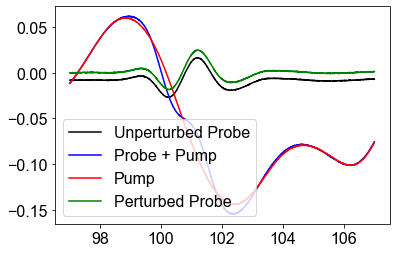

51


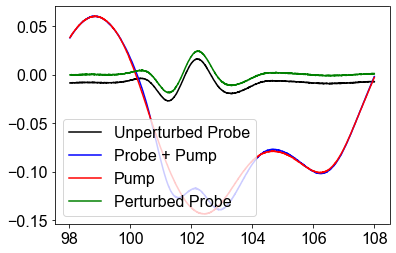

52


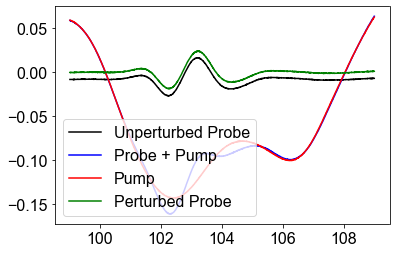

Tue Mar 16 12:35:49 2021


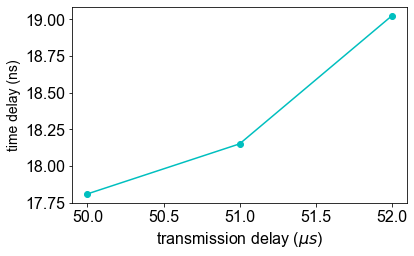

In [106]:
#for name in Folder_Name[1:3]:  #should start from 1 like:[1:]
name= FILE_NAME
path=pathbase+str(name)+'/'#+"/Removed_Lines/"
print_directory=path+"/0_RESULTS/"
#tshifts2=Compute_Filter_All_Delays(delayvec,delay_scale_fact,missing_data,delaystep,path,fname_part2,fnameend,
#                                    winlen,recompute,flipdelays=flipdelays)

delayvec = np.arange(start, stop, delaystep, dtype)

for timedelays in delayvec:
    print(timedelays)
    #timedelays= int(timedelays)
    timedelays= timedelays
    fname_root=path
    #print fname_root
    # probe: black signal
    prdat=timedata('prdat') 
    readlabdat(fname_root+"pr"+str(timedelays)+".csv",prdat)
    plt.plot(prdat.time*1e6,prdat.data,'k',label="Unperturbed Probe")
    
    
    #pump and probe: blue signal
    ppdat=timedata('ppdat')
    readlabdat(fname_root+"pp"+str(timedelays)+".csv",ppdat)
    plt.plot(ppdat.time*1e6,ppdat.data,'b',label="Probe + Pump")
    
    
    # pump: red signal
    pudat=timedata('pudat')
    readlabdat(fname_root+"pu"+str(timedelays)+".csv",pudat)
    plt.plot(ppdat.time*1e6,pudat.data,'r',label="Pump")
    
    if timedelays == start:
        s_wave=[[ppdat.time*1e6],[pudat.data]]
    else:
        s_wave= np.concatenate((s_wave,[[ppdat.time*1e6],[pudat.data]]), axis=1)
      
    # (pump and probe signal) - pump: green signal 
    plt.plot(ppdat.time*1e6,ppdat.data-pudat.data,'g',label="Perturbed Probe")
    #plt.xlim((0,300))
    
    plt.legend()
    plt.show()

missing_data=np.array([])#12,21,22,25,26,29,43])
fname_part2=''
fnameend='.csv'

winlen=60e-6  #window over which the cross-correlation is computed
recompute=1 #recompute=0: =1 will recompute the delays (e.g. to change the window length), and save them to 
#           disk (delays.txt) in the same directory as the data.  If this is set to 0 it will only compute the 
#           delays if it doesn't find the file delays.txt

tshifts2=shifts('tshifts2')

# With correls
tshifts2, fits, correls, lags=Compute_Filter_All_Delays(delayvec,delay_scale_fact,missing_data,delaystep,path,fname_part2,fnameend,
                                   winlen,recompute=recompute,dofilter=0, getCorrels=True)

# Without correls
# tshifts2 =Compute_Filter_All_Delays(delayvec,delay_scale_fact,missing_data,delaystep,path,fname_part2,fnameend,
#                                     winlen,recompute=recompute,dofilter=0)

plt.plot(tshifts2.delays,tshifts2.raw,'co') # actual
plt.plot(tshifts2.delays,tshifts2.remove_noise_wiggles,'c') # smothed
plt.xlabel('transmission delay ($\mu s$)',fontsize=16) 
plt.ylabel('time delay (ns)',fontsize=14)
#plt.legend('1',loc=10,fontsize=12)


plt.gcf().subplots_adjust(bottom=0.2) # make room for x-axis labels

figname='Delays.png'
#plt.savefig(print_directory+figname,bbox_inches='tight',dpi=200)

aa = np.asarray(tshifts2.delays)
bb = np.asarray(tshifts2.raw)
cc = np.asarray(tshifts2.remove_noise_wiggles)
merged = np.concatenate(([[aa],[bb],[cc]]))
#np.savetxt(print_directory+"Delays.csv",merged.T, delimiter=",")

#fig = plt.figure()

print(time.ctime())

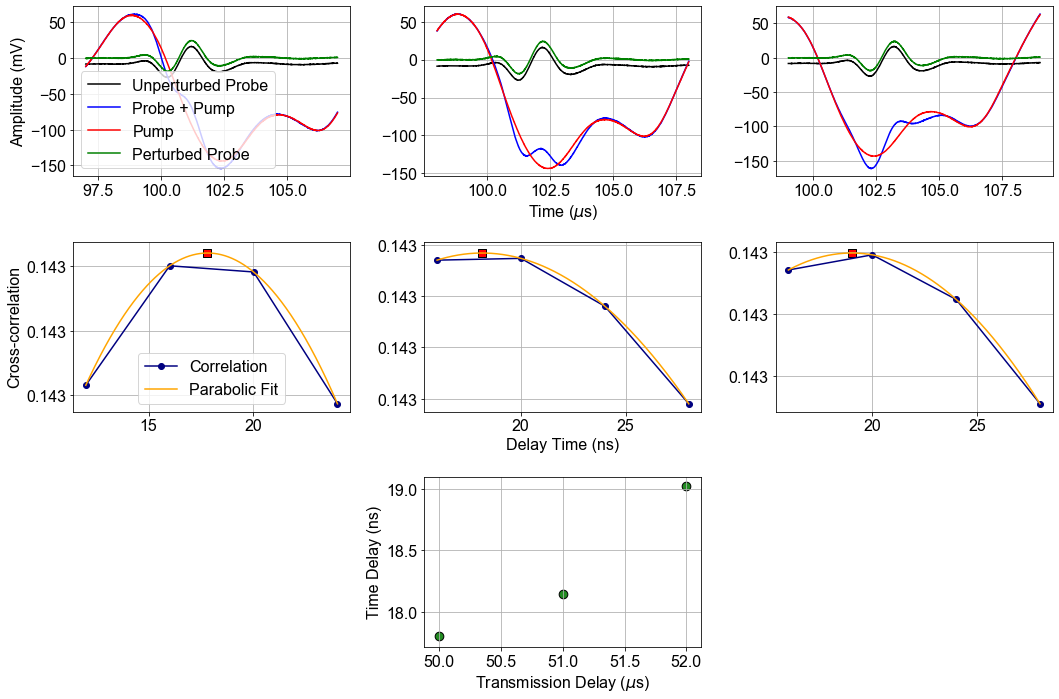

In [107]:
ncols = 3
nrows = 3
fig, ax = plt.subplots(ncols, nrows, figsize=(15, 10))
for i, timedelays in zip(range(nrows),delayvec):
    fname_root=path
    prdat=timedata('prdat') 
    readlabdat(fname_root + "pr" + str(timedelays) + ".csv", prdat)
    ax[0, i].plot(prdat.time * 1e6, prdat.data * 1e3, 'k', label = "Unperturbed Probe")


    ppdat = timedata('ppdat')
    readlabdat(fname_root + "pp" + str(timedelays) + ".csv" , ppdat)
    ax[0, i].plot(ppdat.time * 1e6, ppdat.data * 1e3 ,'b', label = "Probe + Pump")


    pudat = timedata('pudat')
    readlabdat(fname_root + "pu" + str(timedelays) + ".csv", pudat)
    ax[0, i].plot(ppdat.time * 1e6, pudat.data * 1e3,'r', label = "Pump")

    if timedelays == start:
        s_wave = [[ppdat.time * 1e6], [pudat.data]]
    else:
        s_wave = np.concatenate((s_wave, [[ppdat.time * 1e6], [pudat.data * 1e3]]), axis = 1)
    ax[0, i].plot(ppdat.time * 1e6, ppdat.data * 1e3 - pudat.data * 1e3, 'g', label = "Perturbed Probe")
    ax[0,0].legend()
    ax[0, i].grid()
    ax[0, 1].set_xlabel('Time ($\mu$s)',fontsize=16)
    ax[0, 0].set_ylabel('Amplitude (mV)',fontsize=16)

for i, correl, fit, lag in zip(range(nrows), correls, fits, lags):
    xx = np.linspace(min(lag), max(lag), 1000)
    fitCurve = np.poly1d(fit)
    ax[1, i].plot(abs(lag*1e9), correl, '-o', label = 'Correlation', color = 'navy')
    ax[1, i].plot(abs(xx*1e9), fitCurve(xx), label = 'Parabolic Fit', color = 'orange')
    ax[1, i].scatter(abs(xx[np.argmax(fitCurve(xx))]*1e9), max(fitCurve(xx)), marker='s', s=50, color='r', edgecolors='k')
    ax[1, i].ticklabel_format(useOffset=False)
    ax[1, 0].legend()
    ax[1, i].grid()
    ax[1, 1].set_xlabel('Delay Time (ns)',fontsize=16)
    ax[1, 0].set_ylabel('Cross-correlation',fontsize=16)
    ax[1, i].yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.3f}"))
    
    
for fit, lag, timedelays in zip(fits, lags, delayvec):
    xx = np.linspace(min(lag), max(lag), 1000)
    fitCurve = np.poly1d(fit)
    ax[2, 1].scatter(timedelays, abs(xx[np.argmax(fitCurve(xx))])*1e9,  s=75, color='forestgreen', edgecolors='k')
    ax[2, 1].ticklabel_format(useOffset=False)
    ax[2, 1].set_xlabel('Transmission Delay ($\mu$s)',fontsize=16)
    ax[2, 1].set_ylabel('Time Delay (ns)',fontsize=16)
    ax[2, 1].grid()
    
fig.delaxes(ax[2,0])
fig.delaxes(ax[2,2])
plt.tight_layout()
plt.show()

In [ ]:
name= FILE_NAME
path=pathbase+str(name)+'/'#+"/Removed_Lines/"
print_directory=path+"/0_RESULTS/"
fname_root=path

In [ ]:
timedelays = 50

plt.figure(figsize=(10,6))
prdat=timedata('prdat') 
readlabdat(fname_root+"pr"+str(timedelays)+".csv",prdat)
plt.plot(prdat.time*1e6,prdat.data,'k',label="Unperturbed probe")
plt.plot((prdat.time*1e6)+50e-3,prdat.data,'g',label="Perturbed probe")
plt.ylabel('Time ($\mu s$)')
plt.ylabel('Amplitude (V)')
plt.xlim(75,82)
plt.legend()
plt.grid()
plt.show()

## Plotting Individual Transmission Delays

In [ ]:
def getDat(path, stage, timedelay):
    dat = timedata(stage)
    readlabdat(fname_root+stage+str(timedelay)+".csv",dat)
    
    return dat

In [ ]:
getDelays= np.arange(0, 100, 1)
pr_getDelays = []
pp_getDelays = []
pu_getDelays = []
print(getDelays)

In [ ]:
for i in getDelays:
    prdat_i = getDat(path=path, stage='pr', timedelay=i)
    pr_getDelays.append(prdat_i)
    
    ppdat_i = getDat(path=path, stage='pp', timedelay=i)
    pp_getDelays.append(ppdat_i)
    
    pudat_i = getDat(path=path, stage='pu', timedelay=i)
    pu_getDelays.append(pudat_i)

In [ ]:
nrows = 1
fig, ax = plt.subplots(nrows,3, figsize = (12, 5))#, sharex=True, sharey=True)
j = 0
k = 0
if nrows == 1:
    for i in range(0, len(getDelays)):
        ax[k].set_title('Transmission delay: '+ str(getDelays[i]))
        ax[k].plot(pr_getDelays[i].time*1e6,pr_getDelays[i].data,'k',label="S_2:probe data")
        ax[k].plot(pp_getDelays[i].time*1e6,pp_getDelays[i].data,'b',label="S_3:probe + pump data")
        ax[k].plot(pp_getDelays[i].time*1e6,pu_getDelays[i].data,'r',label="S_1:pump data")
        ax[k].plot(pp_getDelays[i].time*1e6,pp_getDelays[i].data-pu_getDelays[i].data,'g',label="S_3 - S_1 = S_4")
        ax[k].grid()
        k = k+1
else:
    for i in range(0, len(getDelays)):
        print(j, k)
        ax[j,k].set_title('Transmission delay: '+ str(getDelays[i]))
        ax[j,k].plot(pr_getDelays[i].time*1e6,pr_getDelays[i].data,'k',label="S_2:probe data")
        ax[j,k].plot(pp_getDelays[i].time*1e6,pp_getDelays[i].data,'b',label="S_3:probe + pump data")
        ax[j,k].plot(pp_getDelays[i].time*1e6,pu_getDelays[i].data,'r',label="S_1:pump data")
        ax[j,k].plot(pp_getDelays[i].time*1e6,pp_getDelays[i].data-pu_getDelays[i].data,'g',label="S_3 - S_1 = S_4")
        ax[j,k].grid()
        k = k+1
        if k > 3:
            j = j+1
            k = 0
        elif j > 1:
            j = j
        else:
            j = j
            k = k
            
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(2,4, figsize = (12, 5))#, sharex=True, sharey=True)
j = 0
k = 0
for i in range(0, len(getDelays)):
#     print(j, k)
    ax[j,k].set_title('Transmission delay: '+ str(getDelays[i]))
    ax[j,k].plot(pr_getDelays[i].time*1e6,pr_getDelays[i].data,'k',label="S_2:probe data")
    ax[j,k].plot(pp_getDelays[i].time*1e6,pp_getDelays[i].data-pu_getDelays[i].data,'g',label="S_3 - S_1 = S_4")
    ax[j,k].grid()
    k = k+1
    if k > 3:
        j = j+1
        k = 0
    elif j > 1:
        j = j
    else:
        j = j
        k = k

plt.tight_layout()
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize = (12,6))

# The data.
ax1.plot(tshifts2.delays, tshifts2.raw, 'rv-', markersize=8, markeredgecolor='k')


ax1.set_xlabel('Transmission delay ($\mu s$)',fontsize=16)
ax1.set_ylabel('Time delay (ns)',fontsize=16)
ax1.set_title('COS Sample A; O1', fontsize=20)
ax1.set_ylim(0,13)
plt.grid()
# Create a set of inset Axes: these should fill the bounding box allocated to
# them.
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.05,0.55,0.4,0.4])
ax2.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 and draw lines
# in grey linking the two axes.
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.5')
mark_inset(ax1, ax2, loc1=1, loc2=3, fc="none", ec='0.5')
# The data: only display for low temperature in the inset figure.

ax2.plot(tshifts2.delays[73:81], tshifts2.raw[73:81], 'rv-', markeredgecolor='k')
#ax2.set_yticks(np.arange(-1,4,1))
#ax2.set_ylim(-1,4)
plt.grid()
plt.show()

## Filtering

In [ ]:
# First, design the Buterworth filter
N  = 2    # Filter order
Wn = 0.3 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
 
# Second, apply the filter
delays_filtered = signal.filtfilt(B,A, tshifts2.remove_noise_wiggles)

In [ ]:
plt.figure(figsize = (14,8))
# plt.plot(tshifts2.delays,tshifts2.remove_noise_wiggles,'c', label = 'Smoothed', \
#          color = 'r') # smoothed
plt.plot(tshifts2.delays,delays_filtered,'c', label = 'Smoothed', \
         color = 'r') # smoothed
plt.xlabel('Transmission delay ($\mu s$)',fontsize=16)
plt.ylabel('Time delay (ns)',fontsize=16)
plt.title('COS Sample A; O2', fontsize=20)
#plt.savefig('Sample_A-2020-07-27.PNG', pad_inches=0.1, bbox_inches='tight')
#plt.text(80, -0.5, "Run 1", fontsize=20)
plt.grid()
plt.legend(fontsize=12)
plt.show()

## Loading Time Delay Data From Disk

In [ ]:
# tshifts2.raw = np.loadtxt('C:/Users/Jacob/Nonlinearity/Data/NS5/Initial/O1/2020-11-25/raw.txt')
# tshifts2.delays = np.loadtxt('C:/Users/Jacob/Nonlinearity/Data/NS5/Initial/O1/2020-11-25/delays.txt')
# tshifts2.trend = np.loadtxt('C:/Users/Jacob/Nonlinearity/Data/NS5/Initial/O1/2020-11-25/trend.txt')
# tshifts2.wiggles = np.loadtxt('C:/Users/Jacob/Nonlinearity/Data/NS5/Initial/O1/2020-11-25/wiggles.txt')
# tshifts2.remove_noise = np.loadtxt('C:/Users/Jacob/Nonlinearity/Data/NS5/Initial/O1/2020-11-25/removed_noise.txt')
# tshifts2.remove_noise_wiggles = tshifts2.raw

## Plotting Multiple Time Delay Experiments

In [ ]:
NS6_raw_I_O1 = tshifts2.raw
NS6_delays_I_O1 = tshifts2.delays
NS6_remove_noise_wiggles_I_O1 = tshifts2.remove_noise_wiggles

In [ ]:
NS5_raw_I_O2 = tshifts2.raw
NS5_delays_I_O2 = tshifts2.delays
NS5_remove_noise_wiggles_I_O2 = tshifts2.remove_noise_wiggles

In [ ]:
Cement_wt_press_raw_Run1_O2 = tshifts2.raw
Cement_wt_press_delays_Run1_O2 = tshifts2.delays
Cement_wt_press_remove_noise_wiggles_Run1_O2 = tshifts2.remove_noise_wiggles

In [ ]:
Cement_wt_press_raw_Run2_O2 = tshifts2.raw
Cement_wt_press_delays_Run2_O2 = tshifts2.delays
Cement_wt_press_remove_noise_wiggles_Run2_O2 = tshifts2.remove_noise_wiggles

In [ ]:
Cement_wt_press_raw_Run3_O2 = tshifts2.raw
Cement_wt_press_delays_Run3_O2 = tshifts2.delays
Cement_wt_press_remove_noise_wiggles_Run3_O2 = tshifts2.remove_noise_wiggles

In [ ]:
Cement_wt_press_raw_Run4_O2 = tshifts2.raw
Cement_wt_press_delays_Run4_O2 = tshifts2.delays
Cement_wt_press_remove_noise_wiggles_Run4_O2 = tshifts2.remove_noise_wiggles

In [ ]:
sum1 = np.add(Cement_wt_press_remove_noise_wiggles_Run1_O2, Cement_wt_press_remove_noise_wiggles_Run2_O2)
sum2 = np.add(sum1, Cement_wt_press_remove_noise_wiggles_Run3_O2)
sum3 = np.add(sum2, Cement_wt_press_remove_noise_wiggles_Run4_O2)
denom = np.ones(len(Cement_wt_press_remove_noise_wiggles_Run1_O2))
denom = denom*4
av = np.divide(sum3, denom)

In [ ]:
plt.figure(figsize = (14,8))

#plt.plot(Cement_delays_Run1_O1,Cement_raw_Run1_O1,'co', label = 'Run 1 Raw', color = 'black') # actual
plt.plot(Cement_wt_press_delays_Run1_O2,Cement_wt_press_remove_noise_wiggles_Run1_O2,'c', label = 'Run 1', \
         color = 'r', alpha = 0.5) # smoothed
plt.plot(Cement_wt_press_delays_Run2_O2,Cement_wt_press_remove_noise_wiggles_Run2_O2,'c', label = 'Run 2', \
         color = 'g', alpha = 0.5) # smoothed
plt.plot(Cement_wt_press_delays_Run3_O2,Cement_wt_press_remove_noise_wiggles_Run3_O2,'c', label = 'Run 3', \
         color = 'navy', alpha = 0.5) # smoothed
plt.plot(Cement_wt_press_delays_Run4_O2,Cement_wt_press_remove_noise_wiggles_Run4_O2,'c', label = 'Run 4', \
         color = 'orange', alpha = 0.5) # smoothed
# plt.plot(NS6_delays_I_O1,NS6_remove_noise_wiggles_I_O1,'c', label = 'Sandstone Sample', \
#          color = 'c') # smoothed
plt.plot(Cement_wt_press_delays_Run1_O2,av,'c', label = 'Average', \
         color = 'magenta') # smoothed

#plt.ylim(-4, 4)
plt.xlabel('Transmission delay ($\mu s$)',fontsize=16)
plt.xticks(np.arange(0,120,10))
plt.ylabel('Time delay (ns)',fontsize=16)
plt.title('Cement Sample Placed in Press; O2', fontsize=20)
# plt.title('Cement Sample wt Wires; O1', fontsize=20)
#plt.savefig('Sample_A-2020-07-27.PNG', pad_inches=0.1, bbox_inches='tight')
#plt.text(80, -0.5, "Run 1", fontsize=20)
plt.grid()
plt.legend(fontsize=12)
plt.show()

## Plotting Single Time Delay Experiment

In [ ]:
plt.figure(figsize = (14,8))
plt.plot(tshifts2.delays,tshifts2.raw,'co', label = 'Raw', color = 'black') # actual
plt.plot(tshifts2.delays,tshifts2.remove_noise_wiggles,'c', label = 'Smoothed', \
         color = 'r') # smoothed
plt.xlabel('Transmission delay ($\mu s$)',fontsize=16)
plt.xticks(np.arange(-68,150,10))
plt.ylabel('Time delay (ns)',fontsize=16)
plt.title('COS Sample A; O2', fontsize=20)
#plt.savefig('Sample_A-2020-07-27.PNG', pad_inches=0.1, bbox_inches='tight')
#plt.text(80, -0.5, "Run 1", fontsize=20)
plt.grid()
plt.legend(fontsize=12)
plt.show()

## Plotting Single Time Delay Experiment With Inset

In [ ]:
fig, ax1 = plt.subplots(figsize = (14,8))

# The data.
ax1.plot(tshifts2.delays, tshifts2.raw, 'rv-', markersize=8, markeredgecolor='k')


ax1.set_xlabel('Transmission delay ($\mu s$)',fontsize=16)
ax1.set_ylabel('Time delay (ns)',fontsize=16)
ax1.set_title('COS Sample A; O2', fontsize=20)
plt.grid()
# Create a set of inset Axes: these should fill the bounding box allocated to
# them.
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.45,0.4,0.5,0.5])
ax2.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 and draw lines
# in grey linking the two axes.
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.5')
mark_inset(ax1, ax2, loc1=1, loc2=3, fc="none", ec='0.5')
# The data: only display for low temperature in the inset figure.

ax2.plot(tshifts2.delays[56:], tshifts2.raw[56:], 'rv-', markeredgecolor='k')
ax2.set_yticks(np.arange(-1,4,1))
ax2.set_ylim(-1,4)
plt.grid()
plt.show()

In [ ]:
name = Folder_Name[1]
print("name is", name)
path=pathbase+str(name)+"/"
print_directory=path+"/0_Results/"

fig = plt.figure()
delayvec=np.arange(0,stop,delaystep)

def updatefig(i):
    fig.clear()
    plt.axes(xlim=(start,stop),ylim=(-0.15,0.15)) 

    #timedelays= int(aa[i])
    fname_root=path

    prdat=timedata('prdat')  #probe
    readlabdat(fname_root+"pr"+str(int(delayvec[i]))+".csv",prdat)

    ppdat=timedata('ppdat')  #pump + probe
    readlabdat(fname_root+"pp"+str(int(delayvec[i]))+".csv",ppdat)   

    pudat_start1=timedata('pudat') # pump
    readlabdat(fname_root+"pu"+str(30)+".csv",pudat_start1)

    pudat_start2=timedata('pudat') # pump
    readlabdat(fname_root+"pu"+str(70)+".csv",pudat_start2)

    #pudat_start3=timedata('pudat') # pump
    #readlabdat(fname_root+"pu"+str(66)+".csv",pudat_start3)

    #pudat_start4=timedata('pudat') # pump
    #readlabdat(fname_root+"pu"+str(76)+".csv",pudat_start3)

    pudat=timedata('pudat') # pump
    readlabdat(fname_root+"pu"+str(int(delayvec[i]))+".csv",pudat)

    plt.plot(prdat.time*1e6,prdat.data,'k',label="S_1:prob data")
    plt.plot(pudat_start1.time*1e6,pudat_start1.data,'r',label="S_1:pump data")
    plt.plot(pudat_start2.time*1e6,pudat_start2.data,'r')
    #plt.plot(pudat_start3.time*1e6,pudat_start3.data,'r',label="S_1:pump data")
    plt.plot(ppdat.time*1e6,ppdat.data,'b',label="S_3:probe + pump data")
    plt.plot(ppdat.time*1e6,ppdat.data-pudat.data,'g',label="S_3 - S_1 = S_4")

    plt.draw()    
    plt.legend(loc=1,fontsize=6)


anim = animation.FuncAnimation(fig, updatefig, shape(delayvec)[0]) #,shape(delayvec1)[0]) #shape(aa)[0])
writergif = animation.PillowWriter(fps=30)
anim.save(print_directory+'filename.gif',writer=writergif)
#anim.save(print_directory+"Movie.mp4", codec='mpeg4', fps=15, dpi=500)



In [ ]:
#color_code=['r','b','g','y','c']
#color_counter=0

for name in Folder_Name[2:2]: #[1:6][6:11] [11:16] [16:21] [21:26][26:31] [31:36]
    
    #if color_counter==5:
        #color_counter=0
    
    Graph_name = name[3:6] #3:6
    Legend_name = name[3:12]    
    
    path=pathbase+str(name)+"/"
    print_directory=path+"/0_Results/"
    
    c1=[]
    c2=[]
    c3=[]
    with open(print_directory+'Delays.csv', 'rb') as csvfile:
        spamreader = csv.reader(csvfile)
        for row in spamreader:
            c1.append(row[0])
            c2.append(row[1])
            c3.append(row[2])
    
    c1_array=np.array(c1)
    c1_array_float=c1_array.astype(np.float)
    c2_array=np.array(c2)
    c2_array_float=c2_array.astype(np.float)
    c3_array=np.array(c3)
    c3_array_float=c3_array.astype(np.float)
    
    #plt.plot(c1_array_float,c2_array_float,str(color_code[color_counter]))
    #plt.plot(c1_array_float,c3_array_float,str(color_code[color_counter]),label=str(Legend_name))
    plt.plot(c1_array_float,c3_array_float,label=str(Legend_name))
    plt.xlabel('Transmission delay ($\mu s$)',fontsize=16) 
    plt.ylabel('Time delay (ns)',fontsize=16)
    plt.legend(loc=2,fontsize=5)
    #plt.ylim((35,45))
    #color_counter=color_counter+1
    
        
figname='Delays_All.png'#+str(Graph_name)+'V.png'
plt.savefig(pathbase+figname,bbox_inches='tight',dpi=500)

## Haupert 2020 Fig 13.1 Recreation

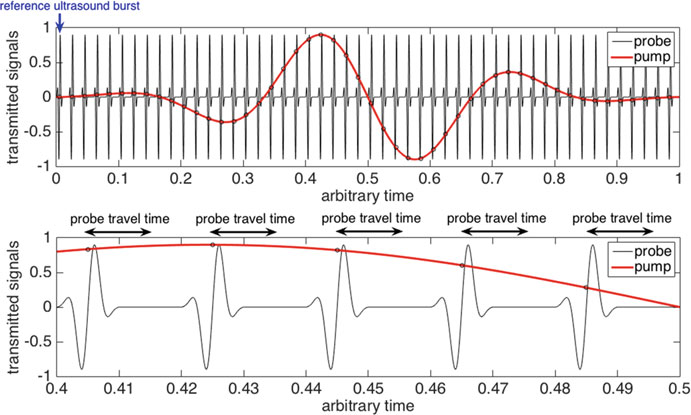

In [ ]:
pump_time = []
pump_sig = []
for i in getDelays[::10]:
    pump_time.append(pp_getDelays[i].time)
    pump_sig.append(pu_getDelays[i].data*10)
    
pump_time_array = np.concatenate(pump_time)
pump_sig_array = np.concatenate(pump_sig)

In [ ]:
probe_time = []
probe_sig = []
for i in getDelays[::4]:
    probe_time.append(pr_getDelays[i].time[1150:][:900])
    probe_sig.append(pr_getDelays[i].data[1150:][:900])
    
probe_time_array = np.concatenate(probe_time)
probe_sig_array = np.concatenate(probe_sig)

In [ ]:
pump_sig = np.loadtxt(pathbase+'10.0V/pump_sig.txt')
pump_sig = pump_sig[:,1]
pump_sig = sp.signal.resample(pump_sig, len(probe_sig_array))

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)
import matplotlib.style as style
style.use('seaborn-paper')

In [ ]:
nrows = 2
ncols = 1
fig, ax = plt.subplots(nrows, ncols, figsize = (12, 6))

# Upper plot main data.
ax[0].plot(probe_time_array*1e6, pump_sig, 'k', label="Pump", lw=2)
ax[0].plot(probe_time_array*1e6, probe_sig_array*10, 'dimgrey', label="Probe", lw=1.5)

# Ploting inset highlights.
ax[0].vlines(min(pp_getDelays[45].time)*1e6, -35, 30, LineStyle='--', lw=3, color='r')
ax[0].vlines(max(pp_getDelays[50].time)*1e6, -35, 30, LineStyle='--', lw=3, color='r')
ax[0].hlines(-35, min(pp_getDelays[45].time)*1e6, max(pp_getDelays[50].time)*1e6, LineStyle='--', lw=3, color='r')
ax[0].hlines(30, min(pp_getDelays[45].time)*1e6, max(pp_getDelays[50].time)*1e6, LineStyle='--', lw=3, color='r')

# Lower plot main data.
ax[1].plot(probe_time_array*1e6,pump_sig, 'k', label="Pump", lw=2)
ax[1].plot(probe_time_array*1e6, probe_sig_array*10, 'dimgrey', label="Probe", lw=1.5)

# Things for both plots.
[ax[i].set_xlabel('Arbitrary time ($\mu s$)', fontsize=16) for i in np.arange(0, nrows,1)]
[ax[i].set_ylabel('Transmitted signals', fontsize=16) for i in np.arange(0, nrows,1)]
[ax[i].grid() for i in np.arange(0, nrows,1)]
[ax[i].legend(loc='lower right') for i in np.arange(0, nrows,1)]

# Limits.
ax[1].set_xlim(min(pp_getDelays[45].time)*1e6, max(pp_getDelays[50].time)*1e6)
ax[1].set_ylim(-35,30)
plt.tight_layout()
plt.show()